$\mathbf{1.}$ [R] Fix p = 1. Write a linear optimization problem using the objective provided in the
description. You may assume that a0 ≥ 0 and a1, a2 do not have bounds on them. (Hint:
Recall that |x| ≥ x and |x| ≥ −x for any real number x.)

for p = 1:
we have the following non linear problem to minimize.$$\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$$
convert into linear $$R_i-a_0-a_1T_i-a_2D_i = y_i$$ for i = 1,2,..,6 
$$y_{i1} = y_i$$ 

if yi>0 and yi1 = 0 

if yi<=0 yi2 = 0

if yi>0 and yi2 = -yi

 if yi<= 0


so |yi| = |yi1-yi2|
 so |yi| = yi1 + yi2
 so our linear objecive function

 minimize $$\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$$
 $$\sum_{i=1}^6|yi|$$
mininimize $$\sum_{i=1}^6|yi1-yi2|$$
so objective
 minimize$$\sum_{i=1}^6yi1+yi2$$
 yi1-yi2 = Ri - a0-a1Ti-a2Di
 
  for  i = 1,2,..6

yij>= 0 for i 1,2,...6,j = 1,2

$\mathbf{Solution}$
p=1








$\mathbf{4.}$ [R] Solve the linear program using cbc solver, report the solver status, solver termination
condition, optimal solution values for the decision variables, and the optimal objective function
value. Comment on your observations.

$\mathbf{Solution}$

solver statuas: ok

solver termination condition: optimal

solver time taken: 0.02753758430480957


Objective= 3986.158753

a0= 0.0

a1= 4.0039722

a2= 8969.6127

Obsevation-forecasting revenue when p=1 and actual revenue have have more difference in the i=1,3,5,6


$\mathbf{5.}$ [R] Now, consider p > 1. Write a general nonlinear optimization problem for p > 1. You
may assume that a0 ≥ 0 and a1, a2 do not have bounds on them

$\mathbf{Solution}$
p>1

Minimize $$\sum_{i=1}^6\mid Q_i \mid^{p}$$



where $Q_{i}$=Ri-$\tilde{Ri}^~$

$\tilde{Ri}^~$=Estimated Revanue

$\tilde{Ri}^~$=a0+a1Ti+a2Di>=0

because ipopt solver can not read the modulus so we can write


$\sum_{i=1}^6(((Ri-a0-a1Ti-a2Di)^2)^{0.5})^P$

since |x|=$\sqrt[]{x}$

a0>=0,$a1,a2\in R$











$\mathbf{7.}$ [R] Solve the respective non-linear optimization problems for p = 1.5, 2 using ipopt solver,
and for each p value report the solver status, solver termination conditions, time taken by
solver, optimal solution values for the decision variables, and the optimal objective function
value. Comment on your observations.


$\mathbf{Solution}$

when p=1.5

solver statuas: ok

solver termination condition: optimal

solver time taken: 0.0464780330657959

Objective= 188066.9240320691

a0= 503.74058049796855

a1= 2.723598706605355

a2= 4802.720279259796

when p=2


solver statuas: ok

solver termination condition: optimal

solver time taken: 0.06101655960083008

Objective= 8399946.933907172

a0= 884.3228326085558

a1= 1.8562362168625832

a2= 3097.0705811830785

Obsevation-obejective when  p=1.5 less than objective  when p=2 and a0  when p=1.5 less  than a0 when p=2 and a1,a2 when p=1.5 greater a1,a2 when p=2

$\mathbf{8.}$ [R] For each value of p ∈ {1, 1.5, 2}, prepare different plots depicting the actual revenue Ri
and the forecast value Rei obtained using your optimization models for the data provided.
Based on the plots, comment with suitable justifications if the forecast model that you have
assumed would be good fit for the given data.

$\mathbf{Solution}$
when we take   p=1 our forecast model estimate the revanue appropriatly since estimated value of revanue for video{1,2,4,5} is approximately equal to actual revanue for videos respectively

$\mathbf{9.}$ [R] Based on your results and plots, suggest using appropriate reasons which value of p is
good for your problem among the three different choices you tried.


$\mathbf{Solution}$ 
when we take p=1 our forecast model estimate the revanue appropriatly since estimated value of revanue for video{1,2,4,5} is approximately equal to actual revanue for videos respectively

In [34]:
!pip install -q pyomo

In [35]:
from pyomo.environ import *

In [36]:
import pandas as pd 

In [37]:
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv("ex2.csv")

In [39]:
df

i    Ri    Vi     Bi   Ai  Averageview  Average_ads
0  1   175   945   2800   23     2.962963     0.024339
1  2   450   832   3900   40     4.687500     0.048077
2  3  1050  2007  24900   78    12.406577     0.038864
3  4   900   800  36450   64    45.562500     0.080000
4  5    19   780    366    4     0.469231     0.005128
5  6  3550  5005  38500  150     7.692308     0.029970

In [40]:
model=ConcreteModel()

In [41]:
model.constraint=ConstraintList()

In [42]:
model.y=Var([i for i in range(0,6)],domain=Reals)

In [43]:
model.x=Var([i for i in range(0,6)],[i for i in range(2)],domain=NonNegativeReals)

In [44]:
model.a0=Var(domain=NonNegativeReals)
model.a1=Var(domain=Reals)
model.a2=Var(domain=Reals)

In [45]:
model.objective=Objective(expr=sum(model.x[i,j] for i in range(6) for j in range(2)))

In [46]:
for i in range(6):
  model.constraint.add(expr=model.x[i,0]-model.x[i,1]==df["Ri"][i]-model.a0-df["Averageview"][i]*model.a1-df["Average_ads"][i]*model.a2)

In [47]:
model.pprint()

5 Set Declarations
    constraint_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   12 : {(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)}
    x_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    x_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

5 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : S

In [48]:
!apt-get install -y -qq coinor-cbc

In [49]:
opt_cbc= SolverFactory('cbc')

In [50]:
result = opt_cbc.solve(model)
print('solver statuas:',result.solver.status)
print('solver termination condition:',result.solver.termination_condition)
print('solver time taken:',result.solver.time)

solver statuas: ok
solver termination condition: optimal
solver time taken: 0.03389477729797363


In [51]:
p1=[model.a0()+df["Averageview"][i]*model.a1()+df["Average_ads"][i]*model.a2() for i in range(6)]

In [52]:
print('\nObjective=',model.objective())
print('a0=',model.a0())
print('a1=',model.a1())
print('a2=',model.a2())


Objective= 3986.158753
a0= 0.0
a1= 4.0039722
a2= 8969.6127


In [53]:
def non_linear(p):
  global model2
  model2=ConcreteModel()
  model2.x=Var(range(6),range(2),domain=NonNegativeReals)
  model2.a=Var(range(3),initialize=2)
  def obje(model2):
    return sum((model2.x[i,0]+ model2.x[i,1])**p for i in range(6))
  model2.objective=Objective(rule=obje,sense=minimize)
  model2.constraints=ConstraintList()
  for i in range(6):
    model2.constraints.add(expr=model2.x[i,0]-model2.x[i,1]==df["Ri"][i]-model2.a[0]-df["Averageview"][i]*model2.a[1]-df["Average_ads"][i]*model2.a[2])



In [54]:
non_linear(1.5)

In [55]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [56]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [57]:
result = solver.solve(model2)

In [58]:
print('solver statuas:',result.solver.status)
print('solver termination condition:',result.solver.termination_condition)
print('solver time taken:',result.solver.time)
p1_5=[model2.a[0]()+df["Averageview"][i]*model2.a[1]()+df["Average_ads"][i]*model2.a[2]() for i in range(6)]
print('\nObjective=',model2.objective())
print('a0=',model2.a[0]())
print('a1=',model2.a[1]())
print('a2=',model2.a[2]())

solver statuas: ok
solver termination condition: optimal
solver time taken: 0.04929852485656738

Objective= 188066.9240320691
a0= 503.74058049796855
a1= 2.723598706605355
a2= 4802.720279259796


In [59]:
non_linear(2)
result = solver.solve(model2)
print('solver statuas:',result.solver.status)
print('solver termination condition:',result.solver.termination_condition)
print('solver time taken:',result.solver.time)
p2=[model2.a[0]()+df["Averageview"][i]*model2.a[1]()+df["Average_ads"][i]*model2.a[2]() for i in range(6)]
print('\nObjective=',model2.objective())
print('a0=',model2.a[0]())
print('a1=',model2.a[1]())
print('a2=',model2.a[2]())

solver statuas: ok
solver termination condition: optimal
solver time taken: 0.04214906692504883

Objective= 8399946.933907172
a0= 884.3228326085558
a1= 1.8562362168625832
a2= 3097.0705811830785


In [60]:
df['forecasting revenue when p=1']=p1
df['forecasting revenue when p=1.5']=p1_5
df['forecasting revenue when p=2']=p2

In [61]:
df

i    Ri    Vi     Bi   Ai  Averageview  Average_ads  \
0  1   175   945   2800   23     2.962963     0.024339   
1  2   450   832   3900   40     4.687500     0.048077   
2  3  1050  2007  24900   78    12.406577     0.038864   
3  4   900   800  36450   64    45.562500     0.080000   
4  5    19   780    366    4     0.469231     0.005128   
5  6  3550  5005  38500  150     7.692308     0.029970   

   forecasting revenue when p=1  forecasting revenue when p=1.5  \
0                    230.171652                      628.702106   
1                    449.999999                      747.407462   
2                    398.270402                      724.183923   
3                    899.999999                     1012.052169   
4                     47.876800                      529.647911   
5                    299.619348                      668.629011   

   forecasting revenue when p=2  
0                    965.201228  
1                   1041.921564  
2                   1027.716847  
3                   1216.663242  
4                    901.076249  
5                    991.420871

<function matplotlib.pyplot.legend(*args, **kwargs)>

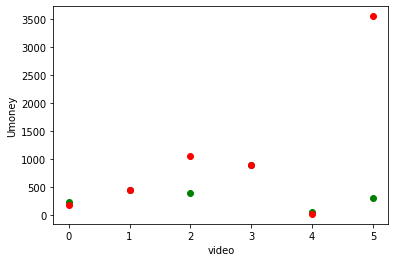

In [67]:
plt.scatter(range(6),df["forecasting revenue when p=1"],label="Forecast revenue for p = 1",color="green")
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='red')
plt.xlabel('video')
plt.ylabel('Umoney')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

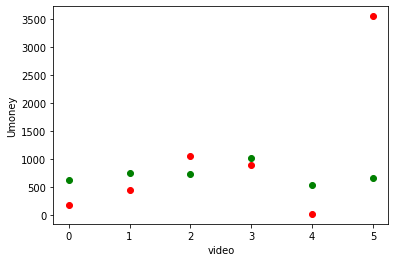

In [68]:
plt.scatter(range(6),df["forecasting revenue when p=1.5"],label="Forecast revenue for p = 1.5",color="green")
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='red')
plt.xlabel('video')
plt.ylabel('Umoney')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

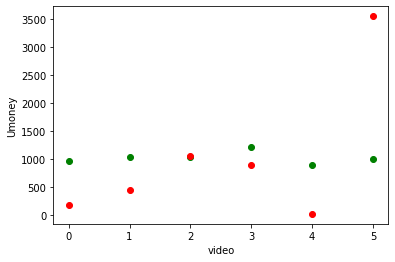

In [69]:
plt.scatter(range(6),df["forecasting revenue when p=2"],label="Forecast revenue for p = 2",color="green")
plt.scatter(range(6),df['Ri'],label='Actual Ri',color='red')
plt.xlabel('video')
plt.ylabel('Umoney')
plt.legend

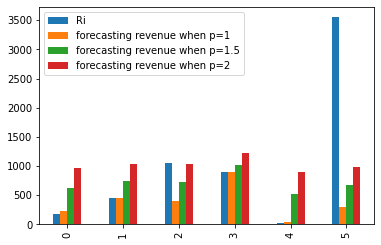

In [64]:
df.loc[:,['Ri','forecasting revenue when p=1','forecasting revenue when p=1.5','forecasting revenue when p=2']].plot(kind='bar')